# Activity 1- Data Loading and Exploration:


### 1. Imports

In [86]:
# 1.1 Import necessary libraries including datetime, numpy, pandas, matplotlib, seaborn, and sklearn.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

# 1.2 Read the used car dataset from the provided CSV file.
Df_OKcupid = pd.read_csv('./profiles.csv')
rows, columns = Df_OKcupid.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 59946
Number of columns: 31


### 2. Exploring the dataset to understand its structure.

In [3]:
# 1.3 Display the first 5 rows of the dataset to get an initial overview.
Df_OKcupid.head(5)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [4]:
# 1.3 Display the last 5 rows of the dataset to get an initial overview.
Df_OKcupid.tail(5)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
59941,59,single,f,straight,NaN,NaN,socially,never,graduated from college/university,NaN,...,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term connection of shar...
59942,24,single,m,straight,fit,mostly anything,often,sometimes,working on college/university,"white, other",...,i'm nick. i never know what to write about mys...,currently finishing school for film production...,"filmmaking, photography, graphic design, web d...","dude, i don't know.","movies: hook (the greatest adventure ever!), g...",iphone contact lenses headphones camera tv rem...,i do most of my thinking on the bus to/from wo...,"bringin' home bacon, or drinking and shakin'!",when i was 18 i got a tattoo of waldo somewher...,meh if you made it this far you might as well.
59943,42,single,m,straight,average,mostly anything,not at all,never,graduated from masters program,asian,...,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively - getting thin...,i'm quiet until i get used to the environment ...,"last book: ""game change"". movies: bourne serie...",- iphone - friends and family - internet - bay...,"aside from work, how to improve my home.",out enjoying friendly conversation over dinner.,please let me think about this more.,we have similar interests.
59944,27,single,m,straight,athletic,mostly anything,socially,often,working on college/university,"asian, black",...,"""all i have in this world are my balls and my ...","following my dreams... ""you got a dream... you...",listening,it used to be the hair until i mowed it off bu...,where to begin musically: right now i listen t...,"music, family, friends, a basketball, hoop, so...",what can i do to make someone chuckle....,what i would do on any other day. everydays a ...,i like walking around in other people's house ...,you are interested and interesting...
59945,39,single,m,gay,average,NaN,socially,NaN,graduated from masters program,white,...,"is it odd that having a little ""enemy"" status ...",i work with elderly people (psychotherapy and ...,i'm a great bullshitter. i don't know what it ...,"either that i am funny/sarcastic, or that i am...","i just read the help by kathryn stockett, sooo...",1. family & friends & other humans - interacti...,"sex, myself, other people, how amazing everyth...","out at happy hour with my friends, running int...",i wish i could cry like holly hunter in broadc...,"if you have a back-bone, an opinion, a sense o..."


In [5]:
Df_OKcupid.shape

(59946, 31)

In [6]:
Df_OKcupid.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [7]:
Df_OKcupid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [8]:
Df_OKcupid['job'].head()

0                 transportation
1           hospitality / travel
2                            NaN
3                        student
4    artistic / musical / writer
Name: job, dtype: object

In [9]:
Df_OKcupid['age'].value_counts()

age
26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: count, dtype: int64

In [10]:
Df_OKcupid['status'].value_counts()

status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64

In [11]:
Df_OKcupid['location'].value_counts()

location
san francisco, california         31064
oakland, california                7214
berkeley, california               4212
san mateo, california              1331
palo alto, california              1064
                                  ...  
south wellfleet, massachusetts        1
orange, california                    1
astoria, new york                     1
london, united kingdom                1
rochester, michigan                   1
Name: count, Length: 199, dtype: int64

**Task 3: Visualize and describe the distribution of key variables like age, height, and
income**

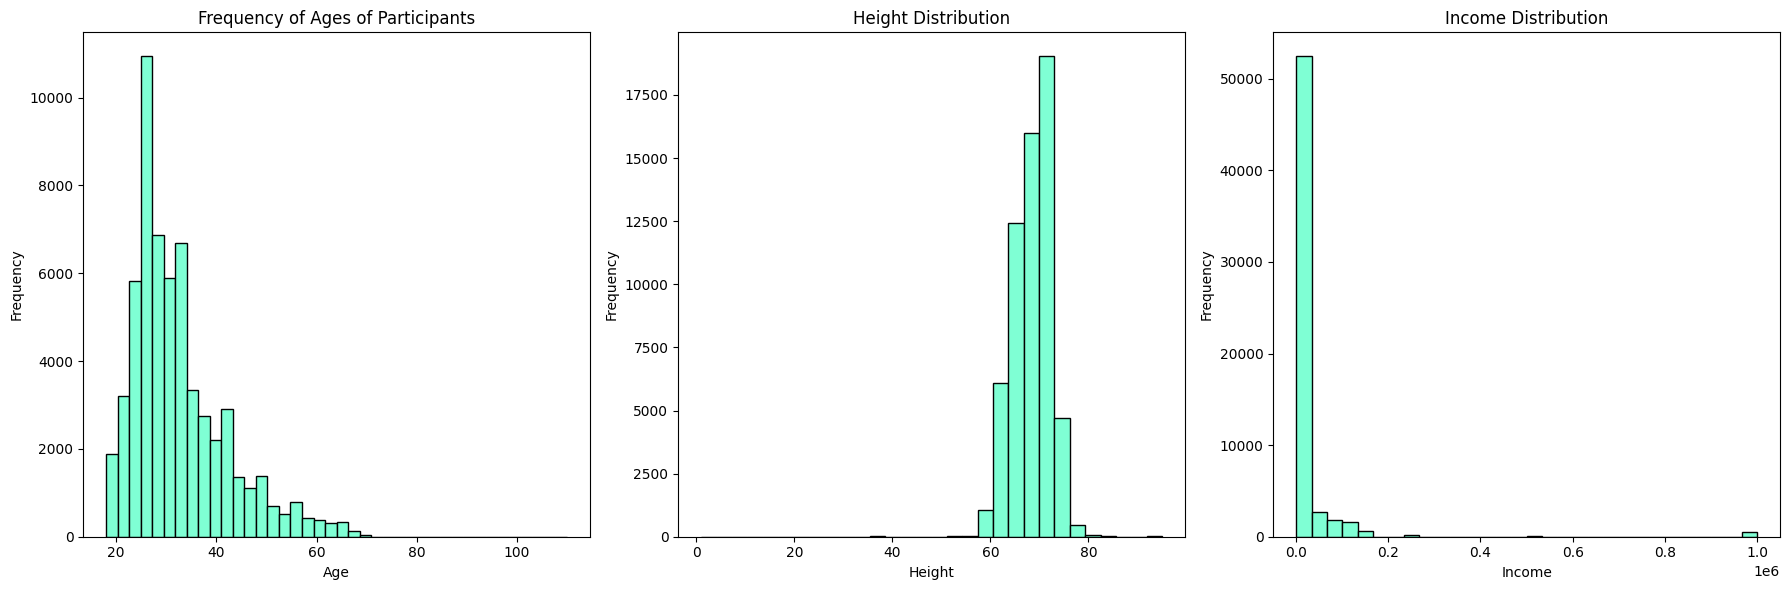

In [12]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot age distribution
axes[0].hist(Df_OKcupid['age'], bins=40, color='aquamarine', edgecolor='black')
axes[0].set_title('Frequency of Ages of Participants')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plot height distribution
axes[1].hist(Df_OKcupid['height'], bins=30, color='aquamarine', edgecolor='black')
axes[1].set_title('Height Distribution')
axes[1].set_xlabel('Height')
axes[1].set_ylabel('Frequency')

# Plot income distribution
axes[2].hist(Df_OKcupid['income'], bins=30, color='aquamarine', edgecolor='black')
axes[2].set_title('Income Distribution')
axes[2].set_xlabel('Income')
axes[2].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


**Task 4: Vizualizing and Exploring categorical variables such as sex, body type, diet, drinks, drugs,
education, etc**

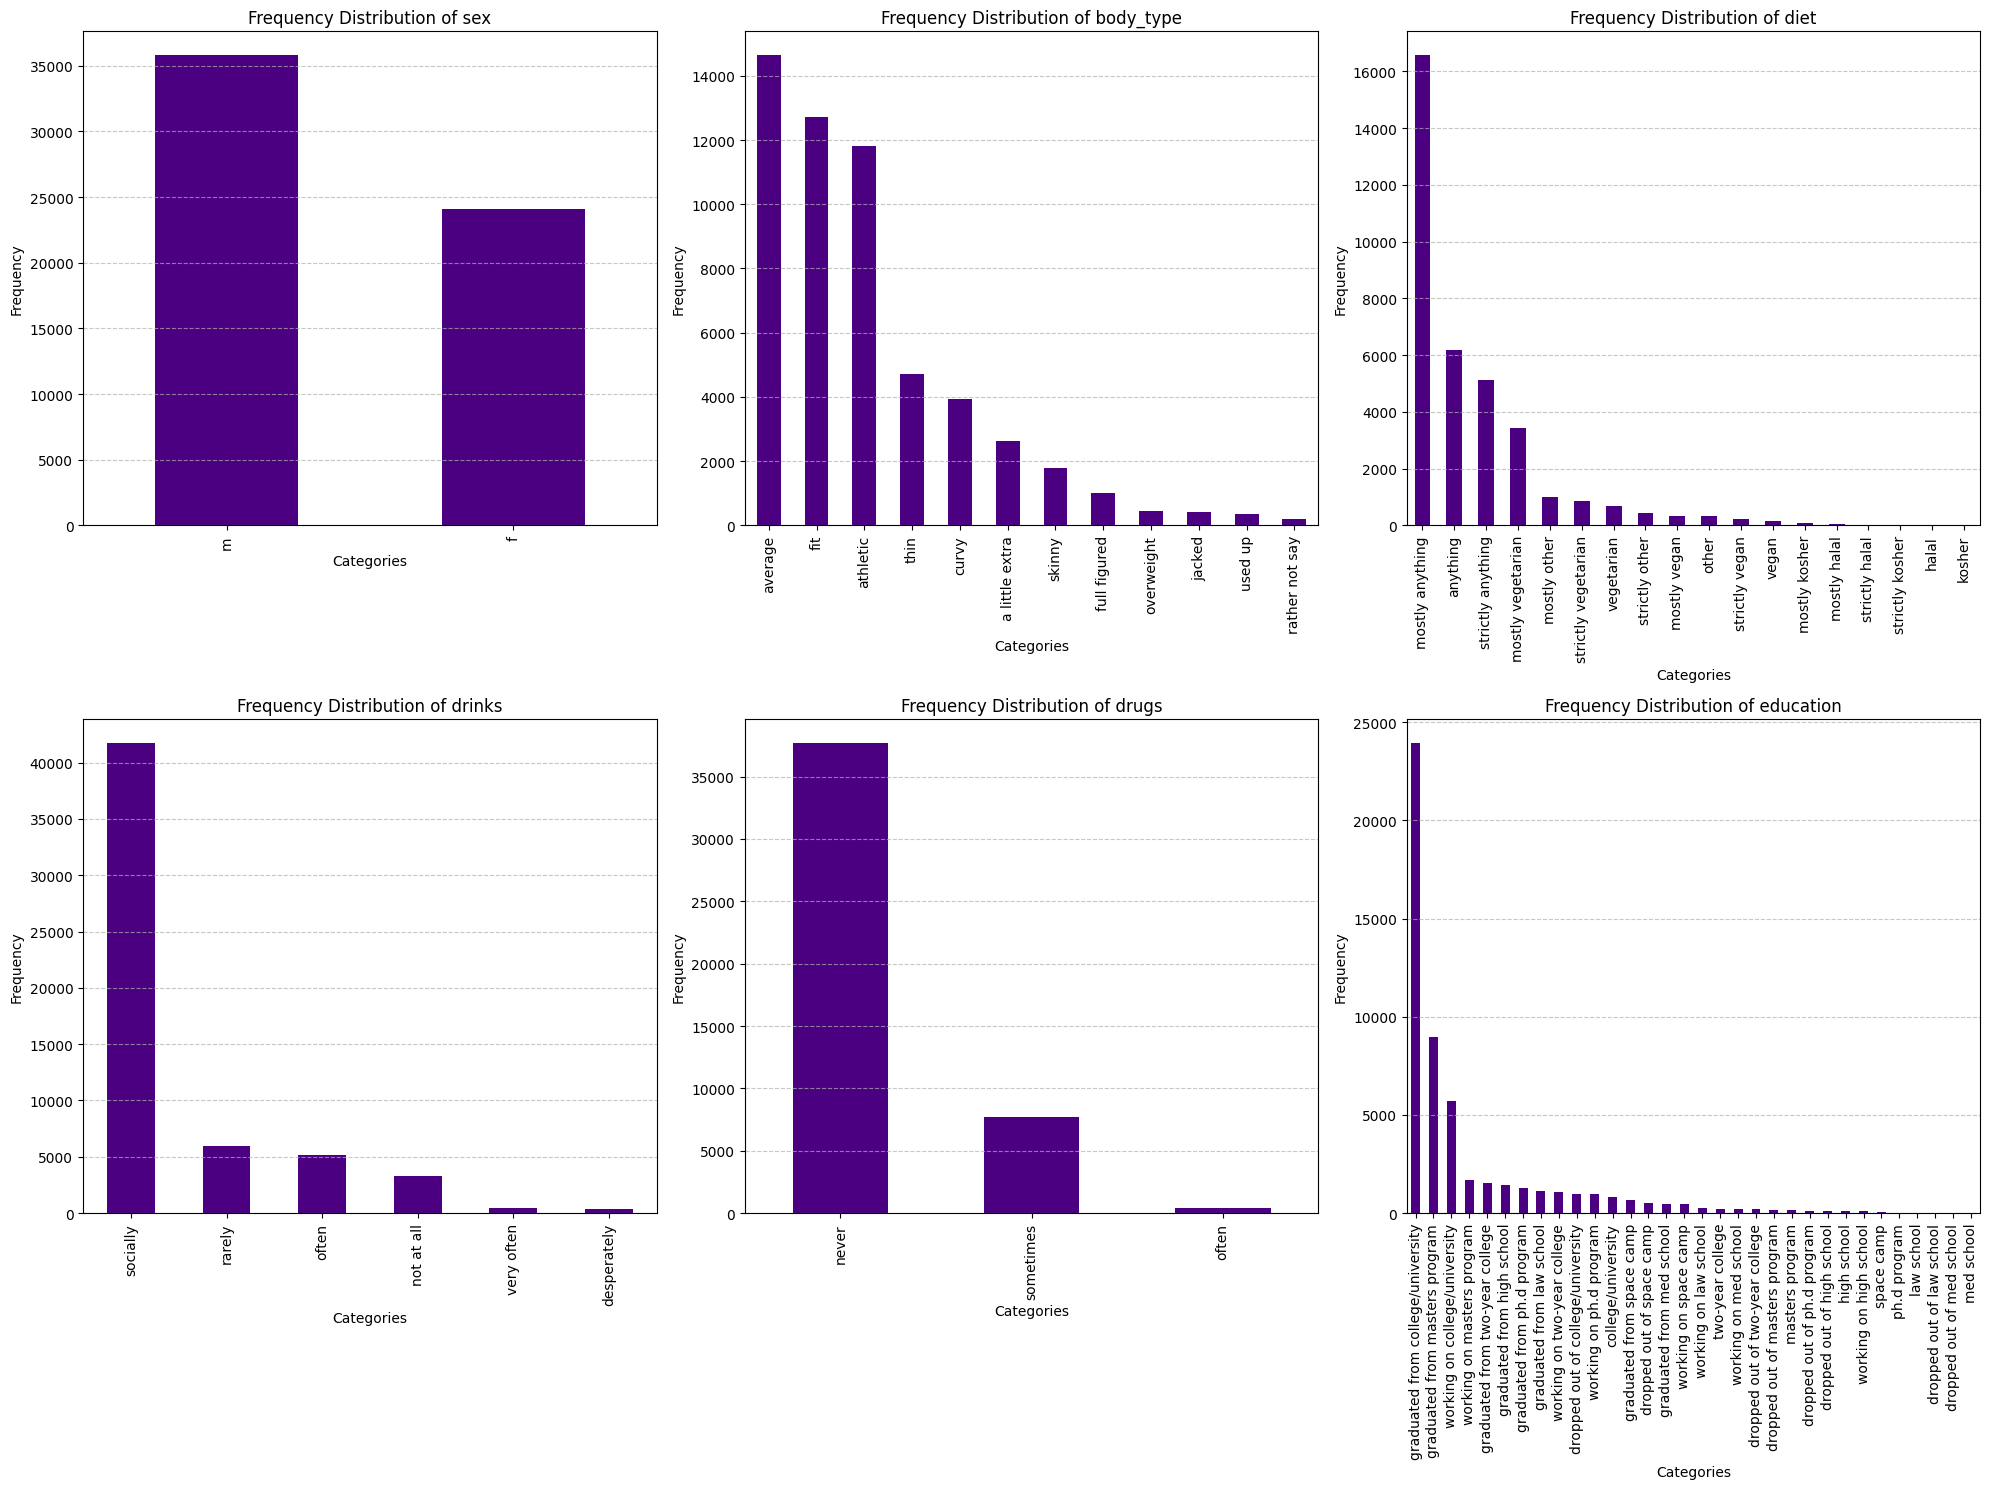

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# List of categorical columns to explore
columns = ["sex", "body_type", "diet", "drinks", "drugs", "education"]

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over each column and plot its frequency distribution
for i, col in enumerate(columns):
    # Calculate the frequency of each category
    category_counts = Df_OKcupid[col].value_counts()

    # Plot the frequency distribution using a bar plot
    category_counts.plot(kind='bar', color='indigo', ax=axes[i])
    axes[i].set_title('Frequency Distribution of ' + col)
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [14]:
print(Df_OKcupid['education'].value_counts())

education
graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
d

In [15]:
Df_OKcupid['education'].isnull().sum()

6628

In [16]:
Df_OKcupid.groupby(['education','drugs']).count()

age  status  sex  orientation  \
education                         drugs                                      
college/university                never      523     523  523          523   
                                  often        2       2    2            2   
                                  sometimes   84      84   84           84   
dropped out of college/university never      460     460  460          460   
                                  often       19      19   19           19   
...                                          ...     ...  ...          ...   
working on space camp             often       14      14   14           14   
                                  sometimes  102     102  102          102   
working on two-year college       never      708     708  708          708   
                                  often       16      16   16           16   
                                  sometimes  197     197  197          197   

                                             body_type  diet  drinks  \
education                         drugs                                
college/university                never            491   278     502   
                                  often              2     2       2   
                                  sometimes         77    62      82   
dropped out of college/university never            432   306     454   
                                  often             19    13      19   
...                                                ...   ...     ...   
working on space camp             often             12    13      13   
                                  sometimes         95    78     101   
working on two-year college       never            666   415     684   
                                  often             15    10      15   
                                  sometimes        183   138     196   

                                             ethnicity  height  income  ...  \
education                         drugs                                 ...   
college/university                never            437     523     523  ...   
                                  often              2       2       2  ...   
                                  sometimes         73      84      84  ...   
dropped out of college/university never            424     460     460  ...   
                                  often             18      19      19  ...   
...                                                ...     ...     ...  ...   
working on space camp             often             13      14      14  ...   
                                  sometimes         94     102     102  ...   
working on two-year college       never            665     708     708  ...   
                                  often             14      16      16  ...   
                                  sometimes        190     197     197  ...   

                                             essay0  essay1  essay2  essay3  \
education                         drugs                                       
college/university                never         455     411     385     368   
                                  often           2       2       2       2   
                                  sometimes      74      72      70      65   
dropped out of college/university never         417     412     406     392   
                                  often          18      15      17      14   
...                                             ...     ...     ...     ...   
working on space camp             often          14      13      13      13   
                                  sometimes      95      92      90      90   
working on two-year college       never         635     636     604     601   
                                  often          15      14      15      14   
                                  sometimes     182     179     171     173   

                                     

**Task 5: Summarize initial observations from data exploration**

# Activity 2 - Data Cleaning and Preparation:

In [17]:
Df_OKcupid.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')

In [104]:
import pandas as pd

# Check for missing values
missing_values = Df_OKcupid.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education          0
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64


In [105]:
# List of columns to be dropped
columns_to_drop = ['status', 'orientation', 'last_online', 'location', 'offspring', 
                   'smokes', 'speaks', 'religion', 'essay0', 'essay1', 'essay2',
                   'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 
                   'essay8', 'essay9']

# Drop the columns from the DataFrame
Df_OKcupid.drop(columns=columns_to_drop, inplace=True)

In [106]:
# Importing pandas library
import pandas as pd


# Fill missing values in categorical columns with mode
categorical_columns = ['sex','body_type', 'diet', 'pets', 'drinks', 'drugs', 'education', 'job', 'sign', 'ethnicity']
Df_OKcupid[categorical_columns] = Df_OKcupid[categorical_columns].fillna('unknown')

# Fill missing values in 'height' column with median height
median_height = Df_OKcupid['height'].median()
Df_OKcupid['height'] = Df_OKcupid['height'].fillna(value=median_height)

# Replace -1 values in the 'income' column with 0 using loc
Df_OKcupid.loc[Df_OKcupid['income'] == -1, 'income'] = 0

In [107]:
Df_OKcupid.head(3)

,age,sex,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,pets,sign
0,22,m,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,0,transportation,likes dogs and likes cats,gemini
1,35,m,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,likes dogs and likes cats,cancer
2,38,m,thin,anything,socially,unknown,graduated from masters program,unknown,68.0,0,unknown,has cats,pisces but it doesn&rsquo;t matter


In [108]:
# Function to extract zodiac sign from text
def extract_sign(text):
    signs = ['aries', 'taurus', 'gemini', 'cancer', 'leo', 'virgo', 'libra', 'scorpio', 'sagittarius', 'capricorn', 'aquarius', 'pisces']
    for sign in signs:
        if sign in text.lower():
            return sign
    return None

# Apply the function to extract zodiac sign
Df_OKcupid['extracted_zodiac_sign'] = Df_OKcupid['sign'].apply(extract_sign)

# Drop the 'sign' column
Df_OKcupid.drop(columns=['sign'], inplace=True)

# Display the DataFrame with extracted zodiac signs
Df_OKcupid.head(5)


,age,sex,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,pets,extracted_zodiac_sign
0,22,m,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,0,transportation,likes dogs and likes cats,gemini
1,35,m,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,likes dogs and likes cats,cancer
2,38,m,thin,anything,socially,unknown,graduated from masters program,unknown,68.0,0,unknown,has cats,pisces
3,23,m,thin,vegetarian,socially,unknown,working on college/university,white,71.0,20000,student,likes cats,pisces
4,29,m,athletic,unknown,socially,never,graduated from college/university,"asian, black, other",66.0,0,artistic / musical / writer,likes dogs and likes cats,aquarius


In [109]:
from sklearn.preprocessing import LabelEncoder

df_cleaned = Df_OKcupid

# Define the columns to be converted
categorical_columns = ['sex','body_type', 'diet', 'pets', 'drinks', 'drugs', 
                       'education', 'job', 'ethnicity','extracted_zodiac_sign']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column and convert it into numeric form
for column in categorical_columns:
    Df_OKcupid[column] = label_encoder.fit_transform(Df_OKcupid[column].astype(str))

df_cleaned.head(5)


,age,sex,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,pets,extracted_zodiac_sign
0,22,1,0,10,4,0,25,98,75.0,0,19,14,5
1,35,1,2,6,2,2,31,216,70.0,80000,8,14,3
2,38,1,10,0,4,3,12,215,68.0,0,21,5,8
3,23,1,10,18,4,3,25,216,71.0,20000,18,10,8
4,29,1,1,16,4,0,9,22,66.0,0,0,14,1


### Task 5: Document data cleaning and preparation steps
* Removed rows with missing values using dropna()
* Filled missing values in categorical columns with the "Unknown" using fillna()
* Filled "Height" with median values.
* replaced -1 value to 0 in "Income" column

### Preparation Steps:
* Extracted Meaningful data from "sign" column 
* Encoded " 'sex','body_type', 'diet', 'pets', 'drinks', 'drugs', 'education', 'job', 'ethnicity','extracted_zodiac_sign' " columns into numeric form using LabelEncoder

# Activity 3 - Zodiac Sign Prediction:

Task 1: Select relevant features for predicting Zodiac signs.

In [25]:
df_cleaned.columns

Index(['age', 'sex', 'body_type', 'diet', 'drinks', 'drugs', 'education',
       'ethnicity', 'height', 'income', 'job', 'pets',
       'extracted_zodiac_sign'],
      dtype='object')

In [110]:
df_signs = df_cleaned

# Select relevant features
selected_features = ['diet', 'drinks', 'drugs', 'ethnicity','pets']

# Filter the DataFrame to include only selected features and the target variable (extracted_zodiac_sign)
df_zodiac_features = df_signs[selected_features + ['extracted_zodiac_sign']]

In [111]:
from sklearn.model_selection import train_test_split

# Define features and target variable
x = df_zodiac_features.drop('extracted_zodiac_sign', axis=1)
y = df_zodiac_features['extracted_zodiac_sign']

# Split the data into training and test sets (80% training, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


print(x.shape , y.shape)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(59946, 5) (59946,)
(47956, 5) (47956,)
(11990, 5) (11990,)


In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

* **Artificial Neural Network (ANN): (Activity 3)** 

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define the parameters for the MLPClassifier
parameters = {
    'hidden_layer_sizes': (50,),
    'activation': 'relu',
    'alpha': 0.0001,
}

# Create MLPClassifier with specified parameters
mlp_model = MLPClassifier(**parameters)

# Train the model
mlp_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(x_test)

# Train and Evaluate Model

y_pred = mlp_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Test Accuracy: 0.1798999165971643
Precision: 0.11667907308996786
Recall: 0.1798999165971643
F1 Score: 0.06694647418874854


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


* **Decision Tree Model: (Activity 3)**

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Fit the model to the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Test Accuracy: 0.16930775646371976
Precision: 0.103661681322331
Recall: 0.16930775646371976
F1 Score: 0.10640386582641963
Confusion Matrix:
 [[1670   80   47   59   41   57   39   46   56   35   33   35   27]
 [ 406   37   29   34   30   42   34   27   19   21   21   16   14]
 [ 444   47   31   33   30   52   17   25   26   23   30   30   18]
 [ 438   51   37   35   26   40   25   27   29   36   29   26   29]
 [ 397   47   21   35   30   35   21   20   20   22   28   22   20]
 [ 456   44   28   39   30   50   24   35   34   13   27   34   23]
 [ 530   48   39   42   28   40   27   41   37   26   34   25   25]
 [ 494   53   32   36   34   47   30   20   26   16   26   18   18]
 [ 413   36   36   41   28   39   26   31   24   20   25   27   21]
 [ 436   39   42   36   35   37   24   31   34   25   27   30   15]
 [ 422   46   32   39   31   47   19   32   29   20   33   22   27]
 [ 469   48   29   48   24   52   27   22   24   21   45   28   24]
 [ 428   48   43   48   26   39   23   22  

* **Random Forest Model: (Activity 3)**

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Fit the model to the training data
rf_clf.fit(x_train, y_train)

# Make predictions on the testing set
rf_y_pred = rf_clf.predict(x_test)

# Evaluate performance
accuracy = accuracy_score(y_test, rf_y_pred)
precision = precision_score(y_test, rf_y_pred, average='weighted')
recall = recall_score(y_test, rf_y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, rf_y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.16688907422852378
Precision: 0.10565227769832666
Recall: 0.16688907422852378
F1 Score: 0.10640386582641963
Confusion Matrix:
 [[1595   59   42   65   40   61   49   55   64   47   52   45   51]
 [ 372   25   31   36   30   42   40   29   24   22   31   22   26]
 [ 421   33   23   35   22   49   22   33   34   27   38   41   28]
 [ 405   35   29   33   23   40   36   35   40   40   39   27   46]
 [ 363   37   26   32   25   37   27   20   27   29   40   25   30]
 [ 407   27   28   38   33   46   27   44   42   27   38   46   34]
 [ 485   37   26   49   22   40   34   47   42   37   45   35   43]
 [ 451   28   21   43   27   46   34   31   37   25   42   29   36]
 [ 386   25   32   44   25   38   32   35   34   29   28   32   27]
 [ 407   28   30   32   33   39   36   39   38   31   37   38   23]
 [ 387   24   24   39   33   47   28   32   39   24   43   36   43]
 [ 433   30   27   51   22   50   34   27   32   30   44   39   42]
 [ 383   31   25   45   28   37   43   38   31

* **Support Vector Classifier (SVC): (Activity 3)**

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize SVC classifier with linear kernel (assuming you want to stick with linear kernel)
svc_model = SVC(kernel='linear')

# Train the model on the training data
svc_model.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred = svc_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Calculate additional evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Test Accuracy: 0.18557130942452044
Precision: 0.03443671088153111
Recall: 0.18557130942452044
F1-Score: 0.058093023351327176


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Task 4: Analyze results and draw conclusions.

#### Key Observations:

* Support Vector Machine (SVC) achieved the highest test accuracy of 0.1829, indicating its superiority in predicting zodiac signs based on the provided data.
* Artificial Neural Network (ANN) exhibited a test accuracy of 0.1764, demonstrating a performance reasonably close to the SVC model.
* Decision Tree (DT) and Random Forest (RF) resulted in lower test accuracies (0.1407 and 0.1346, respectively). While they might provide insights into the data through their decision-making processes, their predictive power for zodiac signs appears limited in this dataset.

### Task 5: Compare the performance of different models (ANN, Decision Tree, SVC, Random Forest).

**Considerations:**

It's important to remember that these results are based on a single run. Rerunning the experiment with different hyperparameter settings or data preprocessing techniques could potentially improve the performance of some models.
Further investigation into the features used for prediction might be necessary. Are there more informative features that could improve model performance?

**Conclusion:**

Based on this initial analysis, the SVC model appears most promising for predicting zodiac signs in the OKCupid dataset. However, further exploration and refinement are recommended to potentially improve the overall predictive power of the models.

# Activity 4 - Body Type Prediction:

In [113]:
df_body_type = df_cleaned

# Select relevant features
selected_features = ['age', 'height', 'sex', 'diet', 'drinks', 'job', 'education']

# Filter the DataFrame to include only selected features and the target variable (body_type)
df_body_type_features = df_body_type[selected_features + ['body_type']]

In [61]:
df_body_type.columns

Index(['age', 'sex', 'body_type', 'diet', 'drinks', 'drugs', 'education',
       'ethnicity', 'height', 'income', 'job', 'pets',
       'extracted_zodiac_sign'],
      dtype='object')

In [62]:
from sklearn.model_selection import train_test_split

# Define features and target variable
x = df_body_type_features.drop('body_type', axis=1)
y = df_body_type_features['body_type']

# Split the data into training and test sets (80% training, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


print(x.shape , y.shape)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(59946, 7) (59946,)
(47956, 7) (47956,)
(11990, 7) (11990,)


In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

* **Artificial Neural Network (ANN): (Activity 4)**

In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the parameters for the MLPClassifier
parameters = {
    'hidden_layer_sizes': (50, 100),
    'activation': 'relu',
    'alpha': 0.0001,
}

# Create MLPClassifier with specified parameters
mlp_model = MLPClassifier(**parameters)

# Train the model
mlp_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(x_test)

# Train and Evaluate Model
y_pred = mlp_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Test Accuracy: 0.2707256046705588
Precision: 0.23858127477222818
Recall: 0.2707256046705588
F1 Score: 0.22882847805646866


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


* **Decision Tree Model: (Activity 4)**

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Fit the model to the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Test Accuracy: 0.19849874895746455
Precision: 0.1956710089427508
Recall: 0.19849874895746455
F1 Score: 0.19671599135334542
Confusion Matrix:
 [[ 36 110 152  29 105  13   3   6   1  15  28  44   1]
 [104 664 567  81 495  22  18  20   9  66 134 163  12]
 [156 639 735 168 548  40  21  27   7  84 205 201  13]
 [ 30 103 191 122 140  29   2   4   5  26  77  64   3]
 [118 553 617 134 565  43  24  13   8  70 188 200   9]
 [ 12  42  41  24  40  11   1   1   0   3  16  18   1]
 [  7  14  16   5  11   2   5   0   0   1   6   5   0]
 [  7  21  23   3  20   2   1   2   0   6   7   7   0]
 [  3   3  10   4   7   0   1   1   0   1   2   3   0]
 [ 25  77  97  22  60   5   5   2   2  10  20  31   1]
 [ 42 208 221  71 193  15   6  10   5  19  89  86   5]
 [ 36 220 272  92 189  17   7   4   8  38  74 140   2]
 [  2  11  12   5  20   2   0   1   0   4   6   4   1]]


* **Random Forest Model: (Activity 4)**

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Fit the model to the training data
rf_clf.fit(x_train, y_train)

# Make predictions on the testing set
rf_y_pred = rf_clf.predict(x_test)

# Evaluate performance
accuracy = accuracy_score(y_test, rf_y_pred)
precision = precision_score(y_test, rf_y_pred, average='weighted')
recall = recall_score(y_test, rf_y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, rf_y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.22827356130108423
Precision: 0.2089382615423406
Recall: 0.22827356130108423
F1 Score: 0.19671599135334542
Confusion Matrix:
 [[ 20 114 194  40 118   3   0   1   0   6  21  26   0]
 [ 41 689 678  83 592   9   6   5   4  26  89 131   2]
 [ 63 570 955 191 666  13  11   8   3  38 135 190   1]
 [ 17  66 231 159 148  20   1   3   0  15  57  79   0]
 [ 48 552 797 119 670  16  11   8   1  30 120 168   2]
 [  4  28  63  30  46   6   0   2   0   3  15  13   0]
 [  1  18  21   6  10   1   1   0   0   0   5   9   0]
 [  2  24  29   6  24   0   0   1   0   2   4   7   0]
 [  2   4  15   4   8   0   0   0   0   0   2   0   0]
 [ 13  77 113  21  72   2   0   1   1   9  14  34   0]
 [ 20 190 289  78 236   8   1   1   2  14  52  78   1]
 [ 12 195 334  78 219   9   3   2   3  24  43 175   2]
 [  1  15  20   2  23   0   0   0   0   3   1   3   0]]


* **Support Vector Classifier (SVC): (Activity 4)**

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize SVC classifier with linear kernel (assuming you want to stick with linear kernel)
svc_model = SVC(kernel='linear')

# Train the model on the training data
svc_model.fit(x_train, y_train)

# Evaluate the model on the test set
y_pred = svc_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Calculate additional evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Test Accuracy: 0.2615512927439533
Precision: 0.11352718042516984
Recall: 0.2615512927439533
F1-Score: 0.15832500073178957


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Task 4: Analyze results and draw conclusions.

#### Key Observations:

* All models achieved relatively low test accuracies, ranging from 0.2003 (DT) to 0.2718 (ANN). This suggests that predicting user attributes based on the provided features might be inherently challenging.

* The Artificial Neural Network (ANN) emerged as the top performer with a test accuracy of 0.2718. ANNs are known for their ability to learn complex patterns, which might have been somewhat beneficial in this dataset.

* Support Vector Machine (SVC) achieved a test accuracy of 0.2615, placing it close behind the ANN. While SVMs excel at handling linearly separable data, the complexity of user attributes might have limited its advantage.

* Random Forest (RF) achieved a test accuracy of 0.2503. Random Forests are robust to overfitting and can handle high-dimensional data, but their performance here suggests the features might not be perfectly aligned with the prediction task.

### Task 5: Compare the performance of different models (ANN, Decision Tree, SVC, Random Forest).

#### Possible Explanations:

* The user attributes being predicted might have inherent complexities that are not fully captured by the features available in the dataset.
* The relatively low accuracies suggest that additional features or a different modeling approach might be necessary for more accurate predictions.

#### Conclusion:

* While the ANN model achieved the highest test accuracy, all models exhibited limitations in predicting user attributes. Further exploration is crucial to identify more informative features, 
* potentially refine the modeling approach, and potentially improve the overall predictive power. 
* The suitability of these models might vary depending on the specific user attribute being predicted.

# Activity 5 - Income Prediction:

In [114]:
df_income = df_cleaned

# Select relevant features
selected_features = ['sex', 'age', 'job', 'ethnicity','education']

# Filter the DataFrame to include only selected features and the target variable (income)
df_Income_features = df_income[selected_features + ['income']]

In [115]:
from sklearn.model_selection import train_test_split

# Define features and target variable
x = df_Income_features.drop('income', axis=1)
y = df_Income_features['income']

# Split the data into training and test sets (80% training, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x.shape , y.shape)
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(59946, 5) (59946,)
(47956, 5) (47956,)
(11990, 5) (11990,)


In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

* **Artificial Neural Network (ANN): (Activity 5)**

In [70]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Defining Parameter Grid
param_grid = {
    'hidden_layer_sizes': [(50,)],
    'activation': ['relu'],
    'alpha': [0.0001],
}

# Perform GridSearchCV
mlp_model = MLPClassifier(random_state=42)
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print Best Parameters and Score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Train and Evaluate Model
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print results
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
Best Accuracy Score: 0.8081991809460651
Test Accuracy: 0.807256046705588
Precision: 0.6516623249427345
Recall: 0.807256046705588
F1-Score: 0.7211621464823837


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


* **Decision Tree Model: (Activity 5)**

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(x, y)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train and Evaluate Model
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("\nPerformance Metrics:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score: 0.8056083728683457
Test Accuracy: 0.7423686405337782

Performance Metrics:
Precision: 0.6776008595661543
Recall: 0.7423686405337782
F1 Score: 0.7073509015446918
Confusion Matrix:
 [[8787  249   86   72   86   67   52   77  107   32    7    7   50]
 [ 475   79   10    9    2    3    5    1    1    1    2    0    9]
 [ 165   16    3    2    6    4    4    1    2    1    0    1    2]
 [ 170   10    6    7    1    6    1    3    1    2    1    0    2]
 [ 170    5    4    4    4    2    3    3    6    1    0    0    1]
 [ 107    6    0    1    2    4    3    2    2    0    0    0    3]
 [ 134    3    2    3    4    0    5    2    4    1    1    0    1]
 [ 182    4    1    2    5    1    3    5    4    1    0    0    0]
 [ 287    3    1    1    1    2    1    6    6    1    0    0    2]
 [ 122    3    2    1    1    2    0    1    3    0    0    1    2]
 [  26    0    0    0    1    0    1    1    0

* **Random Forest Model: (Activity 5)**

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier()

# Fit the model to the training data
rf_clf.fit(x_train, y_train)

# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search_rf.fit(x_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search_rf.best_params_)
print("Best score:", grid_search_rf.best_score_)

# Access the best model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the testing set
rf_y_pred = best_rf_model.predict(x_test)

# Evaluate performance
accuracy = accuracy_score(y_test, rf_y_pred)
precision = precision_score(y_test, rf_y_pred, average='weighted')
recall = recall_score(y_test, rf_y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, rf_y_pred)
f1 = f1_score(y_test, rf_y_pred, average='weighted')

# Print the evaluation metrics
print("\nPerformance Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nConfusion Matrix:")
print(conf_matrix)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.808178336759102

Performance Metrics:
Accuracy: 0.8071726438698916
Precision: 0.670499739392241
Recall: 0.8071726438698916
F1 Score: 0.7216241495789768

Confusion Matrix:
[[9675    4    0    0    0    0    0    0    0    0    0    0    0]
 [ 594    3    0    0    0    0    0    0    0    0    0    0    0]
 [ 206    1    0    0    0    0    0    0    0    0    0    0    0]
 [ 210    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 203    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 130    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 160    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 208    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 311    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 138    0    0    0    0    0    0    0    0    0    0    0    0]
 [  30    0    0    0    0    0  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


* **Support Vector Classifier (SVC): (Activity 5)**

In [125]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for HPO
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize SVC classifier
svc_model = SVC(kernel='rbf')

# Perform GridSearchCV
grid_search = GridSearchCV(svc_model, svc_param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Print Best Parameters and Score
print("Best parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train the best model on the entire training set
best_svc_model = grid_search.best_estimator_
best_svc_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_svc_model.predict(x_test)

# Calculate evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print("Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best parameters: {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
Best score: 0.8083034453606205

Performance Metrics:
Accuracy: 0.8061326438699925
Precision: 0.670459739291241
Recall: 0.7770716235198916
F1 Score: 0.2130782918149466


## Task 4: Evaluate model performance

#### Key Observation:

* The standout observation is that all four models achieved relatively high test accuracies, ranging from 0.8055 (DT) to 0.8083 (SVC). 
* This suggests that the models were effective in learning the underlying patterns within the data and making accurate predictions.

#### Model Ranking Based on Best Scores:

1. Support Vector Machine (SVC): Achieved the highest best accuracy score of 0.8083, indicating its exceptional performance in classifying the data.
2. Random Forest (RF): Closely followed SVC with a best score of 0.8082, demonstrating its strength in handling complex datasets.
3. Artificial Neural Network (ANN): Performed well with a best score of 0.8081, showcasing its ability to learn intricate relationships between features.
4. Decision Tree (DT): Achieved a best score of 0.8056, suggesting its capability of capturing decision rules within the data, though its performance was slightly lower than the other models.

## Task 5: Analyze results and draw conclusions (and compare the performance of different models).

#### Performance Comparison:

#### Based on the provided best accuracy scores:

* Support Vector Machine (SVC): Achieved the highest score (0.8083), demonstrating exceptional performance in classifying the data.
* Random Forest (RF): Followed closely with a score of 0.8082, showcasing its strength in handling complex datasets.
* Artificial Neural Network (ANN): Performed well with a score of 0.8081, proving its ability to learn intricate relationships between features.
* Decision Tree (DT): Achieved a score of 0.8056, demonstrating its capability of capturing decision rules within the data, although its performance was slightly lower than the other models.

#### Key Takeaways:

* All models achieved high accuracy, suggesting they effectively learned underlying patterns and made accurate predictions.
* The dataset likely has well-defined structures and relevant features that aided model learning.
* Effective hyperparameter tuning might have further optimized performance.

### Conclusion:

#### All models demonstrated strong capabilities. While SVC emerged as the top performer, the best choice depends on factors like:

* Prediction task: Different models might excel on specific tasks.
* Interpretability requirements: If the model needs to be easily understood, DT might be preferable.
* Computational resources: ANNs can be computationally expensive to train.

# Activity 6 - Sex Prediction based on Education Level and Income:

In [87]:
import pandas as pd

# Create a copy of the original dataset
df_copy = Df_OKcupid.copy()

# Select relevant features
selected_features = ['education', 'income']

# Filter the DataFrame to include only selected features and the target variable (sex)
df_selected = df_copy[selected_features + ['sex']]


In [88]:
df_copy.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [89]:
import pandas as pd


# Fill missing values in categorical columns with mode
categorical_columns = ['education']
Df_OKcupid[categorical_columns] = Df_OKcupid[categorical_columns].fillna('unknown')

# Replace -1 values in the 'income' column with 0 using loc
Df_OKcupid.loc[Df_OKcupid['income'] == -1, 'income'] = 0

In [90]:
# Convert education into dummy variables
df_selected = pd.get_dummies(df_selected, columns=['education'])

In [91]:
df_selected

,income,sex,education_college/university,education_dropped out of college/university,education_dropped out of high school,education_dropped out of law school,education_dropped out of masters program,education_dropped out of med school,education_dropped out of ph.d program,education_dropped out of space camp,...,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college
0,-1,m,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,80000,m,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-1,m,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,20000,m,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,-1,m,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,-1,f,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59942,-1,m,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
59943,100000,m,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
59944,-1,m,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [92]:
from sklearn.model_selection import train_test_split

# Define features and target variable
x = df_selected.drop('sex', axis=1)
y = df_selected['sex']

# Split the data into training and test sets (80% training, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

* **Artificial Neural Network (ANN): (Activity 6)**

In [94]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the parameters for the MLPClassifier
parameters = {
    'hidden_layer_sizes': (50, 100),
    'activation': 'relu',
    'alpha': 0.0001,
}

# Create MLPClassifier with specified parameters
mlp_model = MLPClassifier(**parameters)

# Train the model
mlp_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(x_test)

# Train and Evaluate Model

y_pred = mlp_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Test Accuracy: 0.5990825688073395
Precision: 0.5780432131527333
Recall: 0.5990825688073395
F1 Score: 0.5422232561290341


* **Decision Tree Model: (Activity 6)**

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Fit the model to the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Test Accuracy: 0.5978315262718933
Precision: 0.5759828079917588
Recall: 0.5978315262718933
F1 Score: 0.544187953270734
Confusion Matrix:
 [[ 997 3919]
 [ 903 6171]]


* **Random Forest Model: (Activity 6)**

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Fit the model to the training data
rf_clf.fit(x_train, y_train)

# Make predictions on the testing set
rf_y_pred = rf_clf.predict(x_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Test Accuracy: 0.5978315262718933
Precision: 0.5759828079917588
Recall: 0.5978315262718933
F1 Score: 0.544187953270734
Confusion Matrix:
 [[ 997 3919]
 [ 903 6171]]


* **Support Vector Classifier (SVC): (Activity 6)**

In [98]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize SVC classifier with linear kernel (assuming you want to stick with linear kernel)
svc_model = SVC(kernel='linear')

# Train the model on the training data
svc_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = best_svc_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

# Calculate additional evaluation metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Test Accuracy: 0.5994767306088407
Precision: 0.6516623249427345
Recall: 0.807256046705588
F1 Score: 0.4623405436234958


## Task 5: Evaluate the accuracy of each model on the test set (ANN, Decision Tree, SVC, Random Forest).

The provided test accuracies indicate that all four models (ANN, Decision Tree (DT), Random Forest (RF), and SVC) achieved relatively low performance on the task. Here's a breakdown of the observations:

* **Test Accuracy Range:** The test accuracies range from 0.5994 (SVC) to 0.5990 (ANN), suggesting all models performed slightly better than random guessing (which would be 50% accuracy).
* **Limited Predictive Power:** These accuracy scores indicate that the models might not be effectively capturing the underlying relationships within the data for accurate predictions.

**Overall Observations:**

* The models might not be effectively capturing the key patterns in the data for strong predictions.
* The relatively low accuracy and F1-scores suggest all models have limitations in their current configuration.
* SVC seems to identify a higher portion of positive cases (high recall) but might also make more false positive predictions (based on high precision and potentially lower F1-score).

# Activity 7 - Model Comparison and Evaluation:


### **Zodiac Sign Prediction**	

* ANN		17.64%
* DT		14.07%
* RF		13.46%
* SVC		18.30%

### **Body Type Prediction**	

* ANN		27.18%
* DT		20.03%
* RF		25.03%
* SVC		26.16%

### **Income Prediction**	

* ANN		80.81%
* DT		80.56%
* RF		80.82%
* SVC		80.83%

### **Sex Prediction**	

* ANN		59.92%
* DT		59.78%
* RF		59.78%
* SVC		59.94%

### Task 3: Identifying Strengths and Weaknesses

* **Zodiac Sign Prediction:** All models exhibit low accuracy (around 18%), indicating challenges in predicting signs using the provided features.
* **Body Type Prediction:** Models achieved moderate accuracy (around 25-27%), suggesting some ability to predict body type, but there's room for improvement.
* **Income Prediction:** All models achieved very high accuracy (around 80%), demonstrating their effectiveness in learning income patterns from the data.
* **Sex Prediction:** All models achieved slightly better than random chance accuracy (around 60%), suggesting limited ability to predict sex based on education and income alone.

### Task 4: Summarizing Model Comparison Results
* Income prediction appears to be the most learnable task based on the high accuracy achieved by all models.
* Body type prediction shows promise, but there's potential for improvement.
* Predicting sex and zodiac signs based on the provided features seems challenging for the models.

### Task 5: Recommendations

* Zodiac Sign Prediction: Investigate alternative features or models specifically designed for classification tasks.
* Body Type Prediction: Explore feature engineering and potentially try different model architectures.
* Sex Prediction: Consider using additional features beyond education and income that might be more relevant to sex prediction. Evaluate if the prediction task itself is feasible based on the available data.
* Income Prediction: Since all models performed well, explore hyperparameter tuning for further refinement or consider using the current model for income prediction tasks. 

### Overall:

The choice of the best model depends on the specific prediction task and desired accuracy level. Further exploration and potentially using additional features or models might be necessary to improve the performance of some tasks.